## Project background

Dalam project ini kita akan menganalisa faktor-faktor yang dapat mempengaruhi kualitas tidur (sleep quality) seseorang. Informasi ini dapat digunakan untuk memberikan saran dan rekomendasi kepada individu atau kelompok untuk meningkatkan kebiasaan tidur mereka dan mencapai tidur yang lebih berkualitas.

In [316]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [317]:
# read data
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Deskripsi variabel:
- Person ID: An identifier for each individual
- Gender: The gender of the person (Male/Female)
- Age: The age of the person in years
- Occupation: The occupation or profession of the person
- Sleep Duration (hours): The number of hours the person sleeps per day
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight)
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure
- Heart Rate (bpm): The resting heart rate of the person in beats per minute
- Daily Steps: The number of steps the person takes per day
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea)

Details about Sleep Disorder Column:
- None: The individual does not exhibit any specific sleep disorder
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks

In [318]:
# ukuran data
df.shape

(374, 13)

In [319]:
# informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [320]:
# informasi data
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [321]:
# cek missing value
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [322]:
# cek apakah ada data yang duplicate
df.duplicated().any()

False

### Define the problem
- Variabel manakah pada data yang mempunyai pengaruh terhadap `Sleep Quality`?
- Apakah variabel `Gender` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Apakah variabel `Age` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Apakah variabel `Occupation` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Apakah variabel `Sleep Duration` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Apakah variabel `Physical Activity Level` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Apakah variabel `Stress Level` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Apakah variabel `BMI Category` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Apakah variabel `Blood Pressure` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Apakah variabel `Heart Rate` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Apakah variabel `Daily Step` mempunyai hubungan yang kuat dengan `Sleep Quality`?
- Bagaimana kesimpulan akhirnya? dan rekomendasi apakah yang dapat dilakukan?

### Data cleaning and preprocessing

In [323]:
# dalam project ini kita tidak menggunakan feature Person ID dan Sleep Disorder
df.drop(['Person ID', 'Sleep Disorder'], axis=1, inplace=True)

# hanya untuk sedikit mempersingkat nama target column
# sekalian memindahkan target column ke belakang
df['Sleep Quality'] = df.pop('Quality of Sleep')

In [324]:
# lihat data unique pada BMI Category
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [325]:
# pada feature BMI Category, seharusnya Normal Weight = Normal
# ubah seluruh Normal Weight menjadi Normal pada  BMI Category
def fix_BMI(x):
    if x == 'Normal Weight':
        return 'Normal'
    return x

df['BMI Category'] = df['BMI Category'].apply(lambda x: fix_BMI(x))

In [326]:
# split Blood Pressure (m/n) menjadi Blood Pressure High (m) dan Blood Pressure Low (n)
df['Blood Pressure High'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0]).astype(int)
df['Blood Pressure Low'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1]).astype(int)
df.drop('Blood Pressure', axis=1, inplace=True)

## Exploratory data analysis

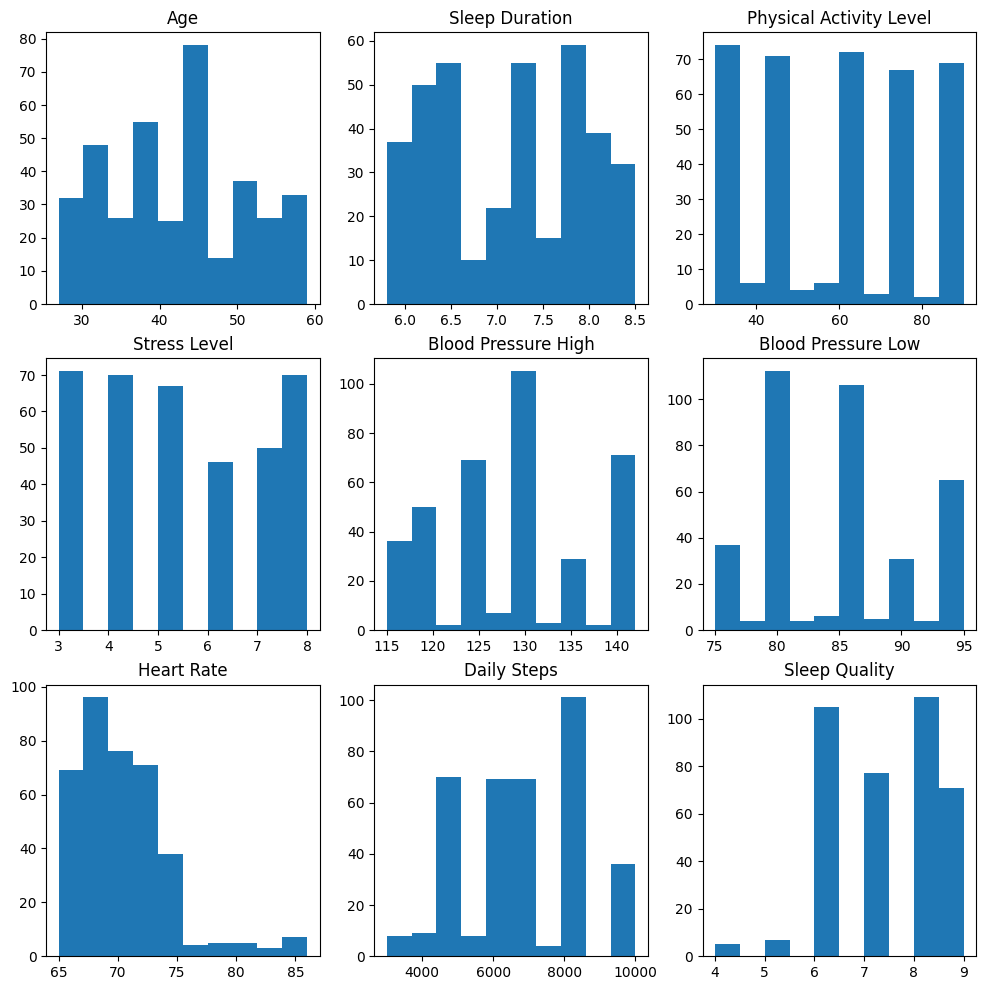

In [327]:
# melihat distribusi numerical features
num_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Blood Pressure High',
            'Blood Pressure Low', 'Heart Rate', 'Daily Steps', 'Sleep Quality']

fig, ax = plt.subplots(3, 3, figsize=(12, 12))

i = 0
for row in range(3):
    for col in range(3):
        ax[row, col].hist(df[num_cols[i]])
        ax[row, col].set_title(num_cols[i])
        i += 1

plt.show()

/Users/zain/python/pacmann/statitistic_for_business/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


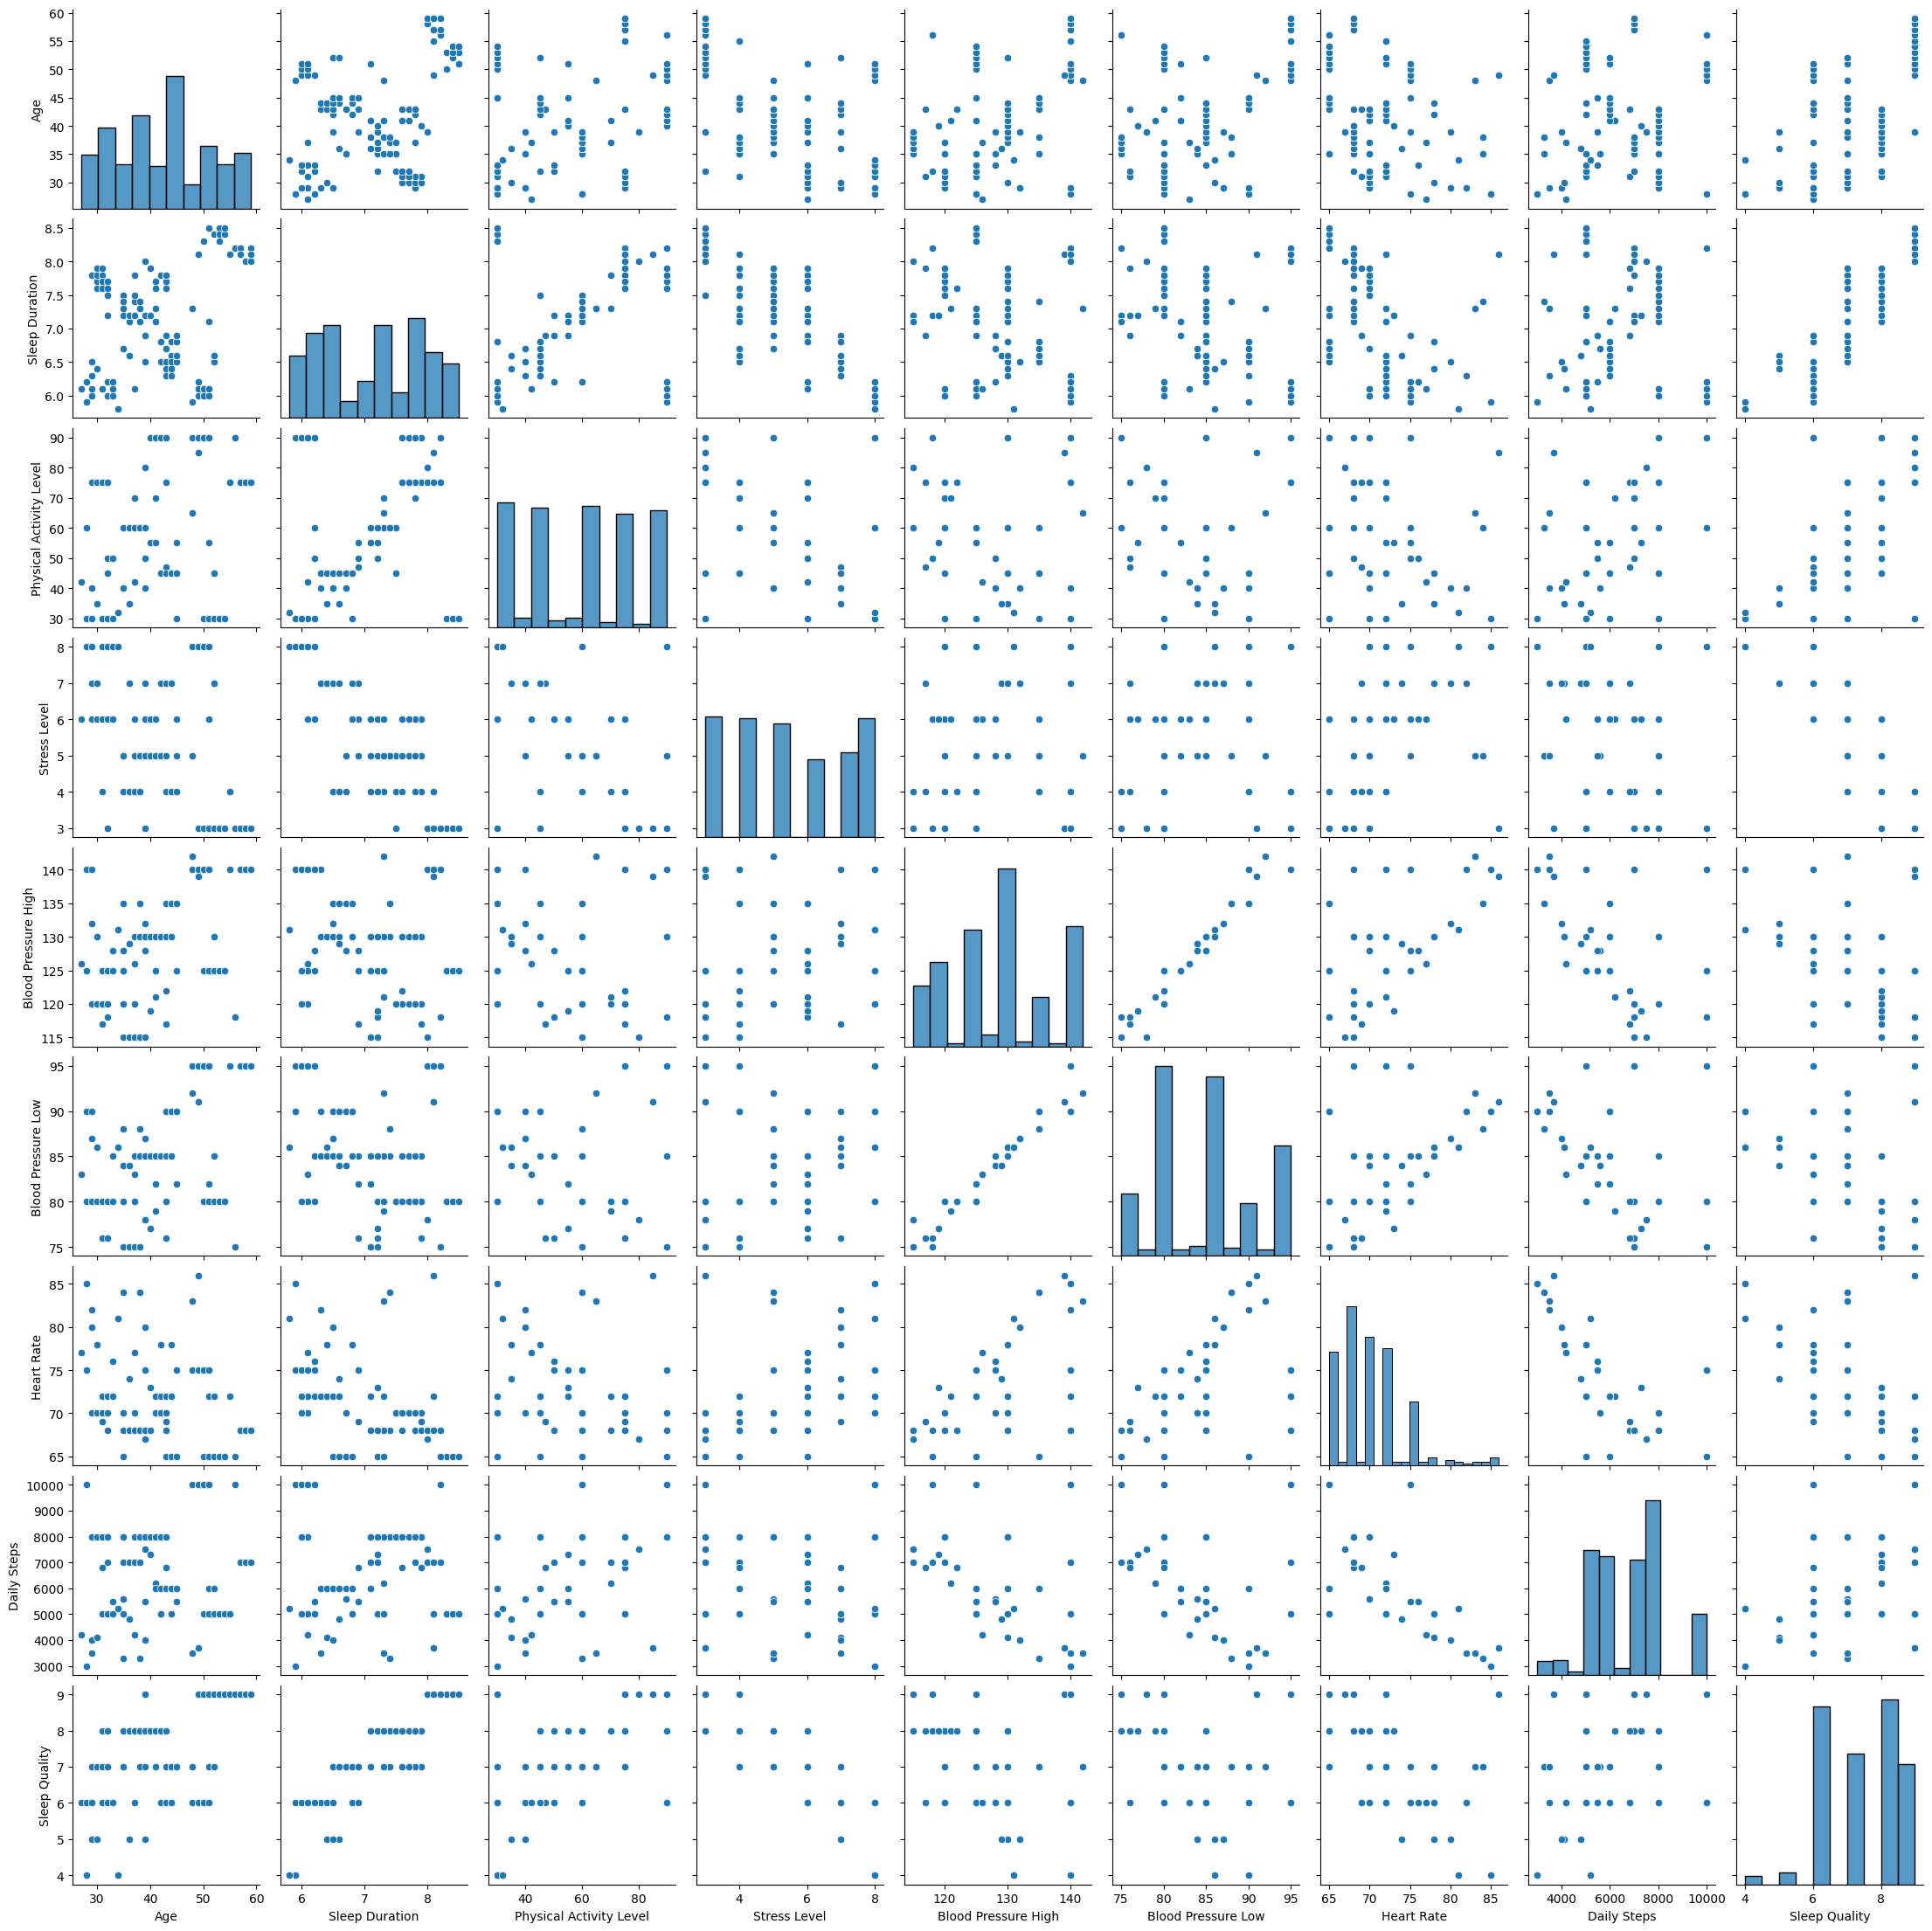

In [328]:
# melihat pairplot pada numerical feature
sns.pairplot(df[num_cols])

<Axes: >

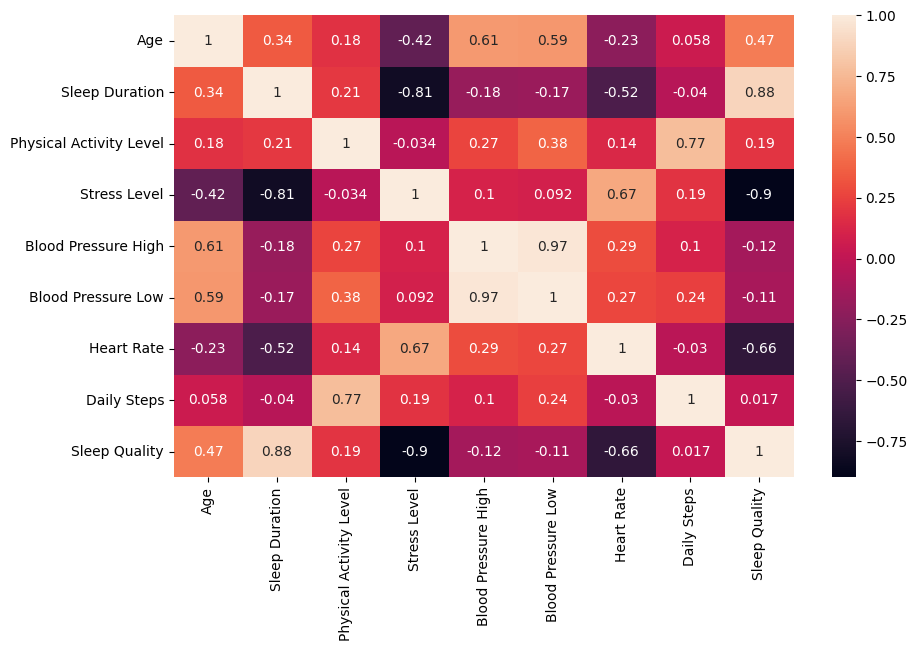

In [329]:
# melihat correlation heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True)

Berdasarkan pairplot dan histmap di atas, maka:
1. `Sleep Quality` mempunyai korelasi yang kuat dengan `Sleep Duration`
2. `Sleep Quality` mempunyai korelasi terbalik yang kuat dengan `Stress Level`
3. `Sleep Quality` mempunyai korelasi terbalik yang cukup kuat dengan `Hearth Rate`

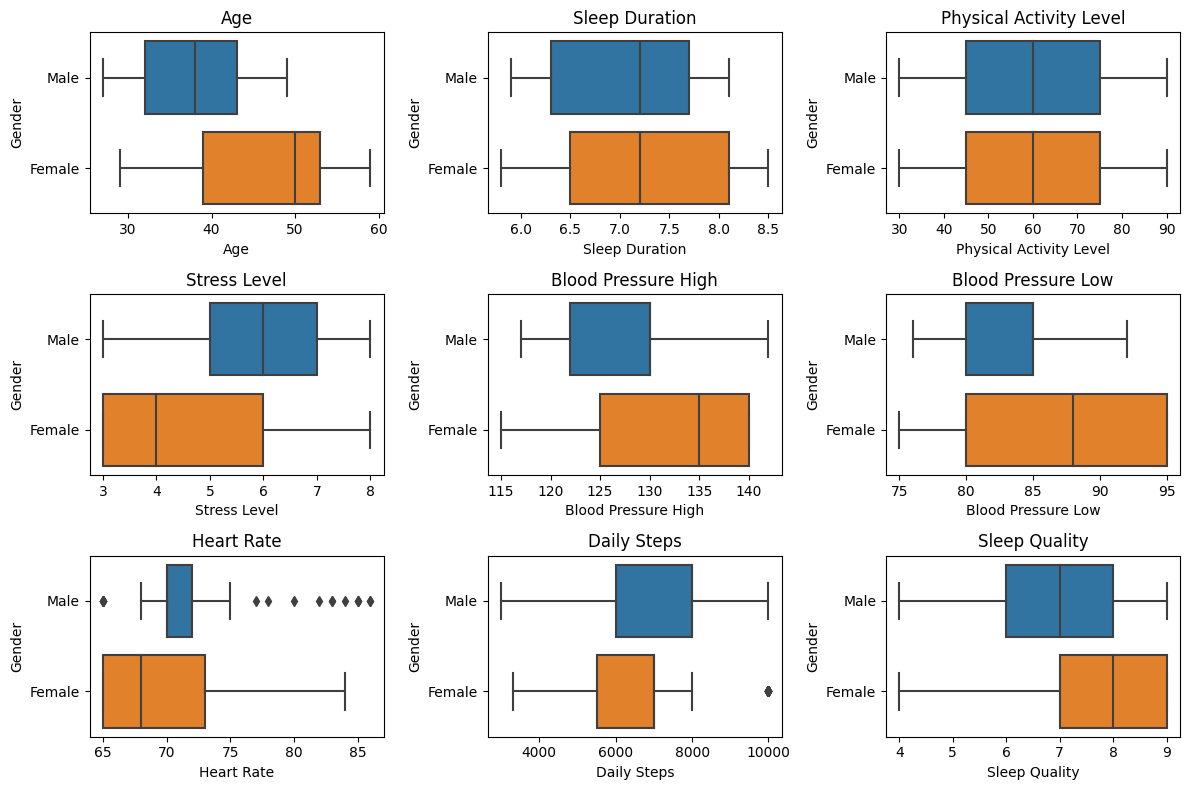

In [330]:
# melihat distribusi by Gender
fig = plt.figure(figsize=(12, 8))

for i in range(len(num_cols)):
    plt.subplot(3, 3, i+1)
    plt.title(num_cols[i])
    sns.boxplot(data=df, y=df['Gender'], x=df[num_cols[i]])
plt.tight_layout()
plt.show()

Berdasarkan boxplot `Gender` terhadap `Sleep Quality`, `Female` cenderung mempunyai `Sleep Quality` yang lebih baik dibandingkan dengan `Male`

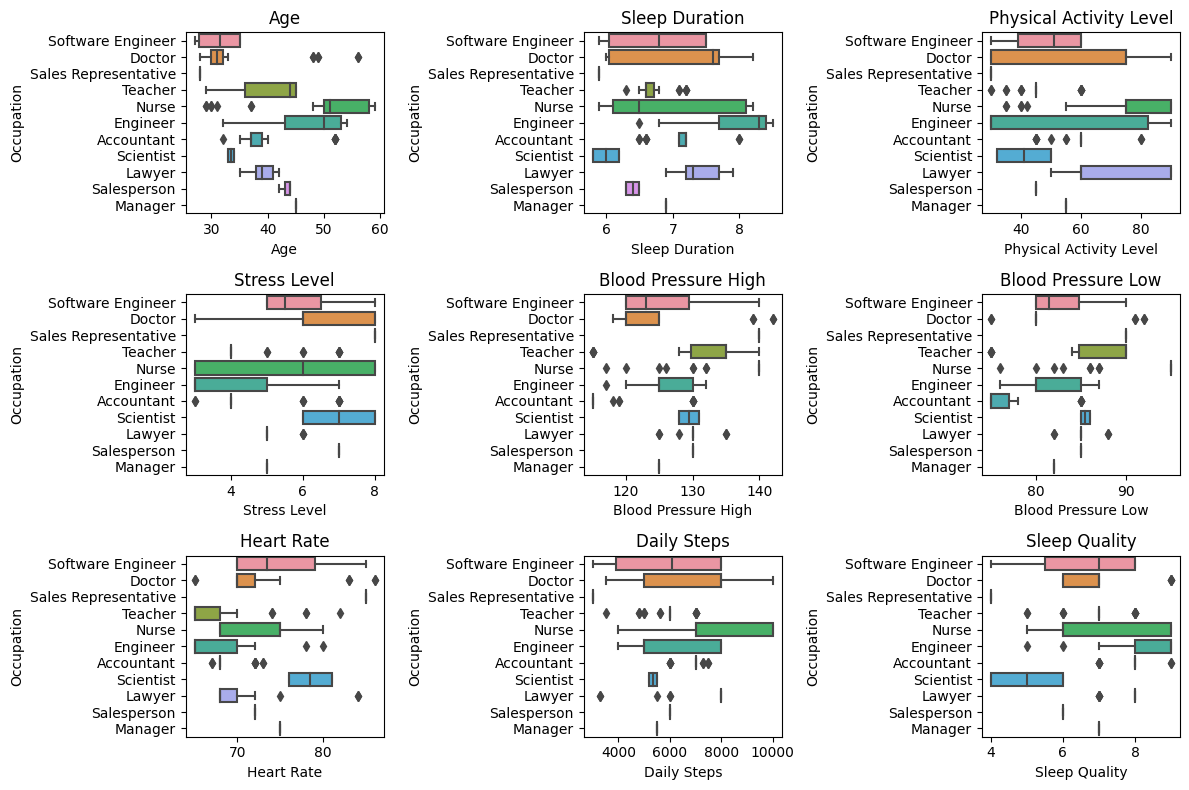

In [331]:
# melihat distribusi by Occupation
fig = plt.figure(figsize=(12, 8))

for i in range(len(num_cols)):
    plt.subplot(3, 3, i+1)
    plt.title(num_cols[i])
    sns.boxplot(data=df, y=df['Occupation'], x=df[num_cols[i]])
plt.tight_layout()
plt.show()

Berdasarkan boxplot `Occupation` terhadap `Sleep Quality`, maka:
1. `Scienteist` cenderung mempunyai `Sleep Quality` yang rendah
2. `Software Engineer` cenderung mempunyai `Sleep Quality` yang sedang
3. `Nurse` cenderung mempunyai `Sleep Quality` dari sedang hingga baik
4. `Engineer` cenderung mempunyai `Sleep Quality` yang baik

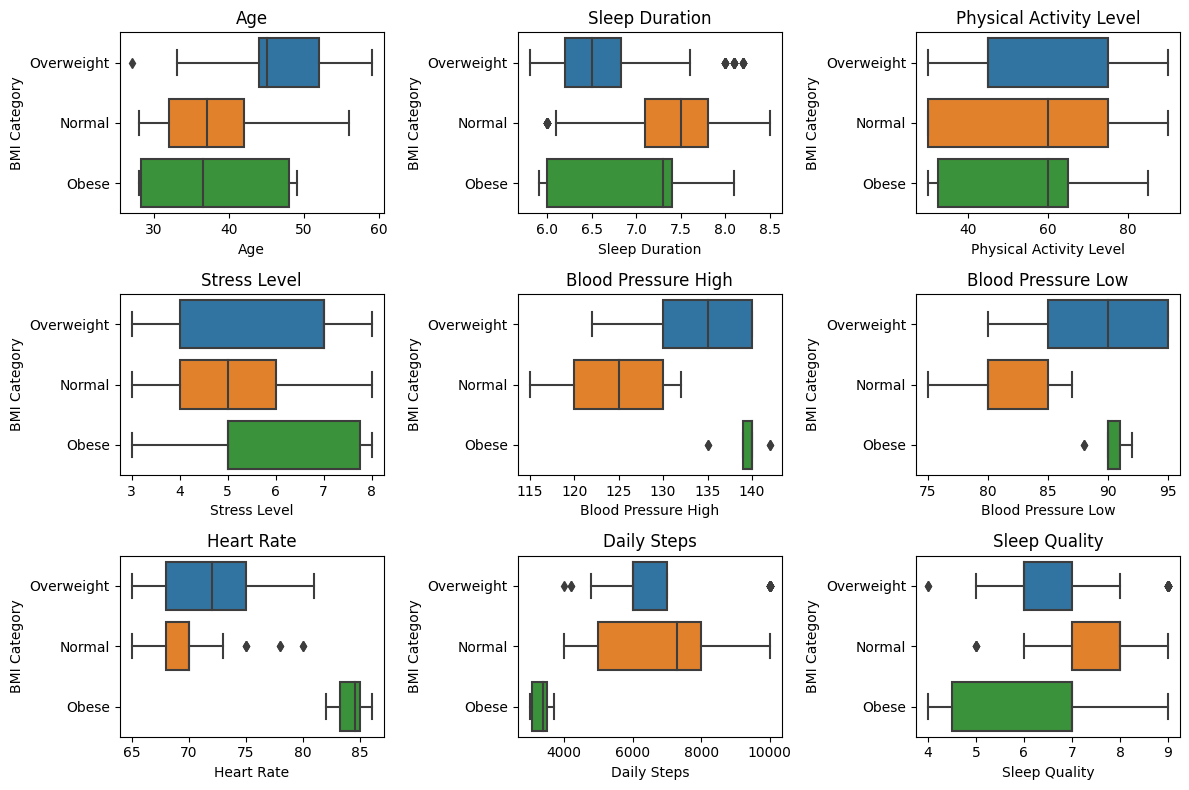

In [332]:
# melihat distribusi by BMI Category
fig = plt.figure(figsize=(12, 8))

for i in range(len(num_cols)):
    plt.subplot(3, 3, i+1)
    plt.title(num_cols[i])
    sns.boxplot(data=df, y=df['BMI Category'], x=df[num_cols[i]])
plt.tight_layout()
plt.show()

Berdasarkan boxplot `BMI Category` dan `Sleep Quality`, semakin normal `BMI Category` seseorang, maka cenderung semakin baik `Sleep Quality`-nya (`Normal` > `Overweight` > `Obese`)

## Performing statistical test

In [333]:
# uji t 2 sampel independen untuk melihat apakah tedapat perbedaan yang signifikan antara jenis kelamin laki-laki dan perempuan
male = df[df['Gender'] == 'Male']['Sleep Quality'] # variabel untuk kategori laki-laki
female = df[df['Gender'] == 'Female']['Sleep Quality'] # variabel untuk kategori perempuan

n_male = male.shape[0] # menghitung jumlah observasi pada kategori laki-laki
n_female = female.shape[0] # menghitung jumlah obsercasi pada kategori perempuan
result = ttest_ind(male, female, alternative='less') # melakukan uji t

print(f'Banyak sampel untuk laki-laki = {n_male}')
print(f'Banyak sampel untuk perempuan = {n_female}')
print('='*50)

print('Hipotesis dan taraf signifikansi:')
print('H0 : μ male - μ female <= 0')
print('H1 : μ male - μ female > 0')
print('alpha = 0.05')
print('='*50)

print(f'Statistik hitung = {result[0]}')
print(f'P value = {result[1]}')
print('='*50)

print('Kesimpulan :')
print('Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05, sehingga diambil keputusan untuk menolak H0, \n\
yang artinya ada perbedaan signifikan Sleep Quality antara Laki-laki dan Perempuan')

Banyak sampel untuk laki-laki = 189
Banyak sampel untuk perempuan = 185
Hipotesis dan taraf signifikansi:
H0 : μ male - μ female <= 0
H1 : μ male - μ female > 0
alpha = 0.05
Statistik hitung = -5.874547760454642
P value = 4.708223266344652e-09
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05, sehingga diambil keputusan untuk menolak H0, 
yang artinya ada perbedaan signifikan Sleep Quality antara Laki-laki dan Perempuan


In [334]:
# uji anova pada pengaruh Occupation
print('Hipotesis dan taraf signifikansi:')
print('H0 : μ software_engineer = μ doctor = μ sales_representative = μ teacher = μ nurse = μ engineer = μ accountant = μ scientiest = μ lawyer = μ salesperson = μ manager')
print('H1 : Setidaknya terdapat satu yang berbeda')
print('alpha = 0.05')
print('='*50)

occupation_model = ols("Q('Sleep Quality') ~ Occupation", data=df).fit() # persamaan linear antara Sleep Quality dengan Occupation
aov_table = sm.stats.anova_lm(occupation_model) # melakuakn uji ANOVA

print('Hasil dari uji ANOVA:')
print(aov_table)
print('='*50)

print('Kesimpulan:')
print('Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05, sehingga diambil keputusan untuk menolak H0. \n\
yang artinya setidaknya ada perbedaan signifikan Sleep Quality pada salah satu bidang Occupation')

Hipotesis dan taraf signifikansi:
H0 : μ software_engineer = μ doctor = μ sales_representative = μ teacher = μ nurse = μ engineer = μ accountant = μ scientiest = μ lawyer = μ salesperson = μ manager
H1 : Setidaknya terdapat satu yang berbeda
alpha = 0.05
Hasil dari uji ANOVA:
               df      sum_sq    mean_sq          F        PR(>F)
Occupation   10.0  241.907020  24.190702  30.022167  6.393557e-42
Residual    363.0  292.491376   0.805761        NaN           NaN
Kesimpulan:
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05, sehingga diambil keputusan untuk menolak H0. 
yang artinya setidaknya ada perbedaan signifikan Sleep Quality pada salah satu bidang Occupation


In [335]:
# uji anova pada pengaruh BMI Category
print('Hipotesis dan taraf signifikansi:')
print('H0 : μ normal = μ overweight = μ obese')
print('H1 : Setidaknya terdapat satu yang berbeda')
print('alpha = 0.05')
print('='*50)

bmi_model = ols("Q('Sleep Quality') ~ Q('BMI Category')", data=df).fit() # persamaan linear antara Sleep Quality dengan BMI Category 
aov_table = sm.stats.anova_lm(bmi_model) # melakuakn uji ANOVA

print('Hasil dari uji ANOVA:')
print(aov_table)
print('='*50)

print('Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05, sehingga diambil keputusan untuk menolak H0. \n\
yang artinya setidaknya ada perbedaan signifikan Sleep Quality pada salah satu BMI Category')

Hipotesis dan taraf signifikansi:
H0 : μ normal = μ overweight = μ obese
H1 : Setidaknya terdapat satu yang berbeda
alpha = 0.05
Hasil dari uji ANOVA:
                      df      sum_sq    mean_sq          F        PR(>F)
Q('BMI Category')    2.0   56.685333  28.342666  22.011391  9.257969e-10
Residual           371.0  477.713063   1.287636        NaN           NaN
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05, sehingga diambil keputusan untuk menolak H0. 
yang artinya setidaknya ada perbedaan signifikan Sleep Quality pada salah satu BMI Category


## Building regression model

Berdasarkan hasil EDA dan pengujian statistik sebelumnya, kita mengetahui bahwa terdapat beberapa variabel yang signifikan memengaruhi `Sleep Quality`.

Variabel yang akan kita gunakan dalam model regresi yaitu:
- `Sleep Duration`
- `Stress Level`
- `Hearth Rate`
- `Gender`
- `Occupation`
- `BMI Category`

In [336]:
# construct ols model
lm = ols("Q('Sleep Quality') ~ Q('Sleep Duration') + Q('Stress Level') + Q('Heart Rate') + Gender + Occupation + Q('BMI Category')", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Q('Sleep Quality')   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     354.4
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          6.91e-208
Time:                        08:36:31   Log-Likelihood:                -68.895
No. Observations:                 374   AIC:                             171.8
Df Residuals:                     357   BIC:                             238.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Dari hasil summary di atas, ada beberapa variable yang tidak signifikan:
- `Gender` tidak signifikan -> keluarkan dari variable
- `Ocuupation`(`Lawyer`, `Manager`, dan `Nurse`) tidak signifikan.
  - `Lawyer` & `Nurse` -> tetap, karena jumlah datanya cukup banyak dan tidak ada grup kategori
  - `Manager` -> hapus, karena jumlah datanya hanya 1
- `BMI Category`(`Overweight`) tidak signifikan -> digabung dengan BMI Normal

In [337]:
# pada feature BMI Category, jadikan katergori overweight menjadi normal karena tidak signifikan
def combine_overweight(x):
    if x == 'Overweight':
        return 'Normal'
    return x

df['BMI Category'] = df['BMI Category'].apply(lambda x: combine_overweight(x))

In [338]:
# hapus kategori Manager pada feature Occupation
print(f"jumlah Occupation Manager = {(df['Occupation']=='Manager').sum()}")

df.drop(df.loc[df['Occupation']=='Manager'].index, inplace=True)

jumlah Occupation Manager = 1


In [339]:
# construct ols model tanpa Gender
lm = ols("Q('Sleep Quality') ~ Q('Sleep Duration') + Q('Stress Level') + Q('Heart Rate') + Occupation + Q('BMI Category')", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Q('Sleep Quality')   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     435.4
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          1.13e-210
Time:                        08:36:31   Log-Likelihood:                -70.491
No. Observations:                 373   AIC:                             169.0
Df Residuals:                     359   BIC:                             223.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

## Analyzing and interpret results

### Kesimpulan dan saran/rekomendasi:
Setelah dilakukan analisis statistik, kita mendapatkan beberapa insight yang di mana dapat menjawab beberapa pertanyaan yang telah disebutkan sebelumnnya

- Variabel manakah pada data yang mempunyai pengaruh terhadap `Sleep Quality`?
    Berdasarkan hasil analisa di atas, terdapat 5 faktor yang dapat mempengaruhi `Sleep Quality` yaitu:
    1. `Sleep Duration` -> Semakin lama tidur, maka cenderung semaik baik `Sleep Quality`-nya
    2. `Stress Level` -> Semakin tinggi stress level seseorang, maka akan semakin jelek `Sleep Quality`-nya
    3. `Heart Rate` -> Semakin tinggi heart rate seseorang, maka akan semakin jelek juga `Sleep Quality`-nya
    4. `Occupation` -> Pekerjaan juga berpengaruh terhadap sleep quality, Engineer cenderung memiliki `Sleep Quality` yang baik, software engineer cenderung memeiliki `Sleep Quality` yang sedang, scientist cenderung memiliki `Sleep Quality` yang jelek
    5. `BMI Category` -> Seseorang dengan BMI normal cenderung memiliki sleep quality yang lebih baik dibandingkan dengan seseorang yang obesitas'
- Apakah variabel `Gender` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari hasil OLS, `Gender` tidak mempunyai hubungan yang kuat dengan `Sleep Quality`, ditandai dengan nilai p-value sebesar 0.518 yang artinya perbedaan `Gender` baik `Male` maupun `Female` tidak berpengaruh signifikan terhadap `Sleep Quality`
- Apakah variabel `Age` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari hasil EDA, `Age` mempunyai hubungan yang kurang kuat dengan `Sleep Quality`, ditandai dengan nilai koefisien korelasi sebesar 0.47
- Apakah variabel `Occupation` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari tes ANOVA, `Occupation` mempunyai hubungan yang kuat dengan `Sleep Quality`, ditandai dengan nilai p-value sebesar kurang dari 0.05 yang artinya setidaknya ada satu kategori yang berpengaruh signifikan
- Apakah variabel `Sleep Duration` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari hasil EDA, `Sleep Duration` mempunyai hubungan sangat kuat dengan `Sleep Quality`, ditandai dengan nilai koefisien korelasi sebesar 0.88
- Apakah variabel `Physical Activity Level` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari hasil EDA, `Physical Activity Level` mempunyai hubungan yang tidak kuat dengan `Sleep Quality`, ditandai dengan nilai koefisien korelasi sebesar 0.19
- Apakah variabel `Stress Level` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari hasil EDA, `Stress Level` mempunyai hubungan yang sangat kuat namun berkebalikan dengan `Sleep Quality`, ditandai dengan nilai koefisien korelasi sebesar -0.9
- Apakah variabel `BMI Category` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari tes ANOVA, `BMI Category` mempunyai hubungan yang kuat dengan `Sleep Quality`, ditandai dengan nilai p-value sebesar kurang dari 0.05 yang artinya setidaknya ada satu kategori yang berpengaruh signifikan
- Apakah variabel `Blood Pressure` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari hasil EDA, `Blood Pressure` baik high maupun low tidak mempunyai hubungan yang kuat dengan `Sleep Quality`, ditandai dengan nilai koefisien korelasi sebesar -0.12 dan -0.11
- Apakah variabel `Heart Rate` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari hasil EDA, `Heart Rate` mempunyai hubungan yang kuat namun berkebalikan dengan `Sleep Quality`, ditandai dengan nilai koefisien korelasi sebesar -0.66
- Apakah variabel `Daily Step` mempunyai hubungan yang kuat dengan `Sleep Quality`?
    - Dari hasil EDA, `Daily Step` mempunyai hubungan yang tidak kuat dengan `Sleep Quality`, ditandai dengan nilai koefisien korelasi sebesar 0.017
- Bagaimana kesimpulan akhirnya? dan rekomendasi apakah yang dapat dilakukan?
    - Ada 5 faktor yang mempengaruhi sleep quality sesorang, yaitu `Sleep Duration`, `Stress Level`, `Heart Rate`, `Occupation`, dan `BMI Category`. Hal-hal yang dapat dilakukan untuk meningkatkan `Sleep Quality` adalah:
    1. Menambah jam tidur sesuai dengan standar jam tidur manusia sesuai usia
    2. Mengurangi tingkat strees (berhubungan juga dengan heart rate), baik itu dengan berlibur atau olah raga ringan setiap hari
    3. Mengurangi berat badan bagi yang obesitas, hal ini dapat dilakukan dengan menjaga pola hidup sehat
